In [ ]:
from tensorflow.keras.datasets import imdb, mnist
from tensorflow.keras.preprocessing import sequence, image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명: 딥러닝알고리즘 구현
- 평가일 : 20220422
- 성명 : 김기현
- 점수 : 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
※ 학습시간 20분
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

정답

In [ ]:
max_features = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test = sequence.pad_sequences(input_test, maxlen = max_len)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(input_dim = max_features, output_dim = 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 79s 476ms/step - loss: 0.6279 - acc: 0.6274 - val_loss: 0.5371 - val_acc: 0.7344
Epoch 2/10
157/157 [==============================] - 75s 477ms/step - loss: 0.4748 - acc: 0.8005 - val_loss: 0.4791 - val_acc: 0.7932
Epoch 3/10
157/157 [==============================] - 75s 480ms/step - loss: 0.3310 - acc: 0.8644 - val_loss: 0.3921 - val_acc: 0.8234
Epoch 4/10
157/157 [==============================] - 75s 480ms/step - loss: 0.2421 - acc: 0.9083 - val_loss: 0.3676 - val_acc: 0.8406
Epoch 5/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1830 - acc: 0.9307 - val_loss: 0.3767 - val_acc: 0.8646
Epoch 6/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1293 - acc: 0.9536 - val_loss: 0.4596 - val_acc: 0.8502
Epoch 7/10
157/157 [==============================] - 75s 476ms/step - loss: 0.0824 - acc: 0.9724 - val_loss: 0.5054 - val_acc: 0.8534
Epoch 8/10
157/157 [==============================] - 7

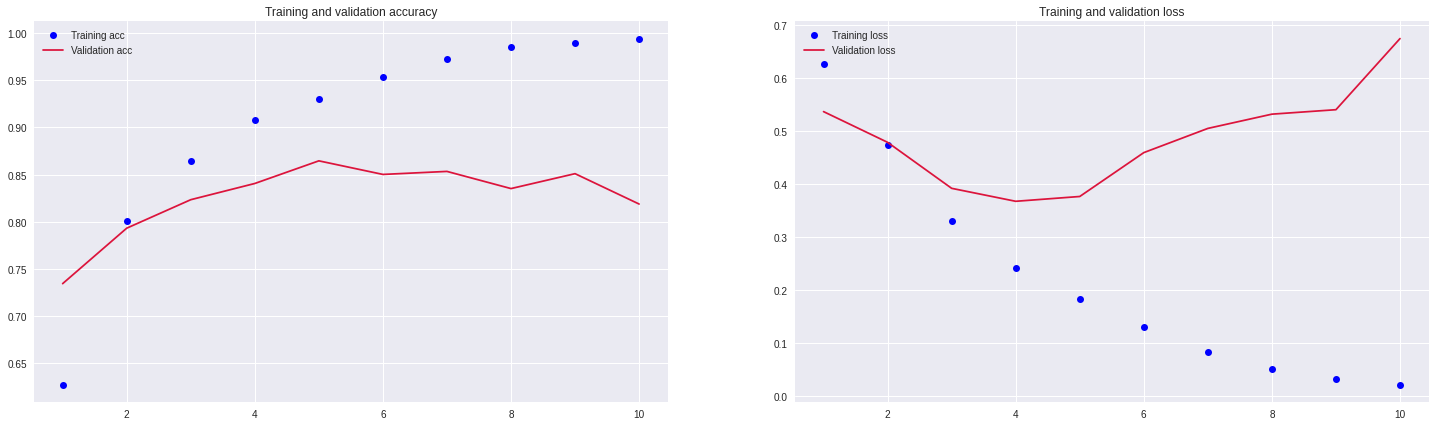

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (25, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, color = 'crimson', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'crimson', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 약 85% 정도의 검증 정확도를 가진다.
- 전체 시퀀스가 아니라 순서대로 500개의 단어만 사용했기 때문에 얻은 정보가 적다.
- SimpleRNN은 긴 시퀀스의 데이터를 처리하기에 적합하지 않다.
- 오래된 과거 시퀀스의 정보까지 반영할 수 있는 변형된 순환신경망을 사용한다.

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

정답

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(input_dim = max_features, output_dim = 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 9s 29ms/step - loss: 0.5105 - acc: 0.7659 - val_loss: 0.4235 - val_acc: 0.7978
Epoch 2/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2944 - acc: 0.8819 - val_loss: 0.3309 - val_acc: 0.8604
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2340 - acc: 0.9127 - val_loss: 0.2833 - val_acc: 0.8866
Epoch 4/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1982 - acc: 0.9258 - val_loss: 0.2925 - val_acc: 0.8734
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1716 - acc: 0.9386 - val_loss: 0.2873 - val_acc: 0.8850
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1600 - acc: 0.9439 - val_loss: 0.3197 - val_acc: 0.8690
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1439 - acc: 0.9499 - val_loss: 0.3344 - val_acc: 0.8752
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

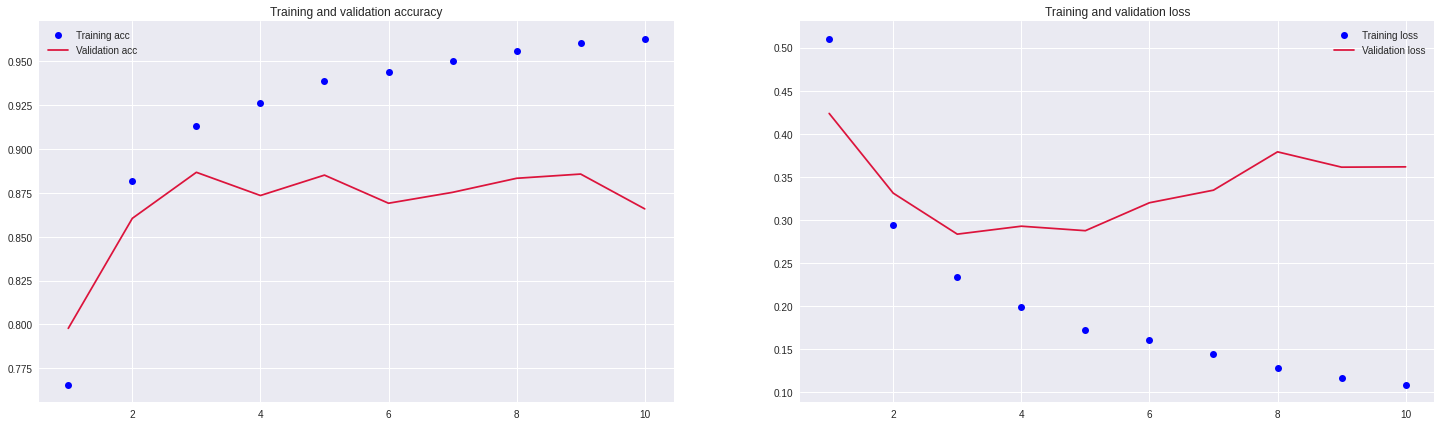

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (25, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, color = 'crimson', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'crimson', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Q3. MNIST 숫자 이미지 데이터에 대하여 CNN 모델을 사용하여 아래사항을 수행하세요
- Conv2D와 MaxPooling2D 층을 사용하여 컨브넷을 생성(채널의 수 32개 또는 64개)
- 출력 텐서를 완전 연결 네트워크에 주입
- 10개의 클래스 분류하기 위한 분류기 추가
- 컨브넷 학습 및 평가

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype(float) / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype(float) / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(train_images, train_labels,
                    epochs = 5,
                    batch_size = 64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1718 - acc: 0.9462
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0487 - acc: 0.9847
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0334 - acc: 0.9896
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0262 - acc: 0.9923
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0205 - acc: 0.9936


In [ ]:
loss, acc = model.evaluate(test_images, test_labels)

print('손실함수 :', loss)
print('정확도 :', acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - acc: 0.9891
손실함수 : 0.03570513427257538
정확도 : 0.9890999794006348


Q4. cats_and_dogs_small으로 축소한 데이터 셋으로 사전 훈련된 네트워크를 사용하여 강아지 고양이 분류 과제를 아래와 같이 수행하세요.
- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용하여 유용한 특성 추출하고 이 특성으로 분류기 훈련
- ImageDataGenerator 사용 (※ 소요시간 20분)
- VGG 매개변수
 - weights는 모델을 초기화할 가중치 체크포인트를 지정 : 'imagenet'
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정 : False
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기 :(150.150,3)
- 데이터 증식을 사용하지 않는 방법으로 수행
- 완전 연결 분류기를 정의하고 규제를 위해 드롭아웃 사용 : 0.5

정답

In [ ]:
base_dir = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [ ]:
vgg16 = VGG16(weights = 'imagenet',
              include_top = False,
              input_shape = (150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
datagen = image.ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg16.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5803 - acc: 0.6785 - val_loss: 0.4324 - val_acc: 0.8520
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4214 - acc: 0.8130 - val_loss: 0.3570 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3526 - acc: 0.8480 - val_loss: 0.3178 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3166 - acc: 0.8710 - val_loss: 0.2972 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2796 - acc: 0.8900 - val_loss: 0.2812 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2718 - acc: 0.8915 - val_loss: 0.2708 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2442 - acc: 0.9065 - val_loss: 0.2629 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

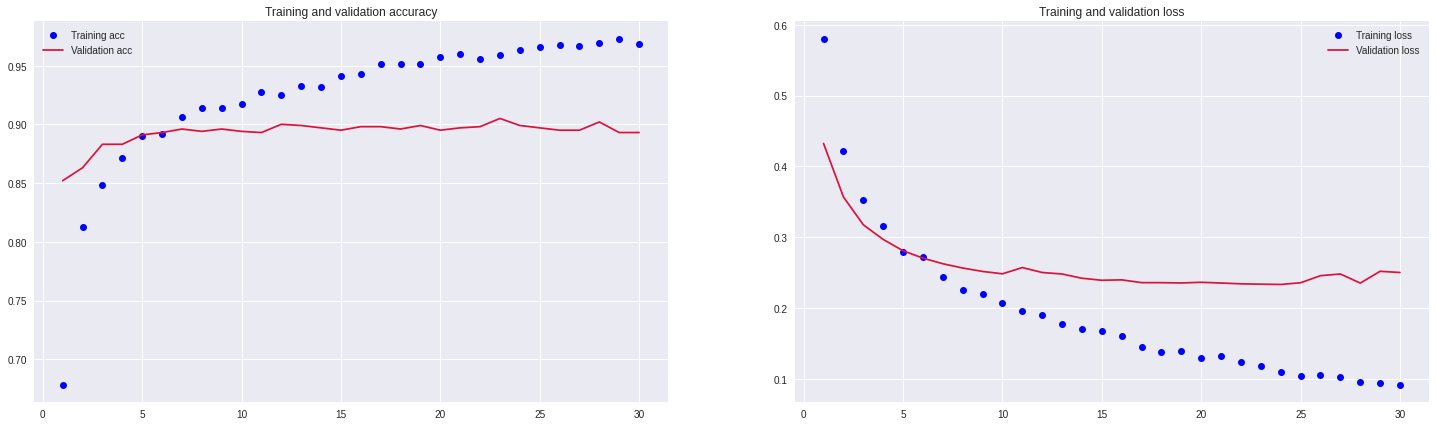

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (25, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, color = 'crimson', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'crimson', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Q5. Q4 문제를 데이터 증식을 사용한 방식으로 수행하세요.

정답

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 20,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         shear_range = 0.1,
                                         zoom_range = 0.1,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest')

test_datagen = image.ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

vgg16.trainable = False

model.compile(optimizer = optimizers.Adam(learning_rate = 0.00002),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_generator,
                    epochs = 30,
                    # steps_per_epoch = 100,
                    # validation_steps = 50,
                    validation_data = validation_generator)

Epoch 1/30
100/100 [==============================] - 24s 231ms/step - loss: 0.6286 - acc: 0.6415 - val_loss: 0.4721 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 23s 228ms/step - loss: 0.4879 - acc: 0.7620 - val_loss: 0.3830 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 23s 226ms/step - loss: 0.4237 - acc: 0.8050 - val_loss: 0.3384 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.3872 - acc: 0.8270 - val_loss: 0.3136 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 22s 223ms/step - loss: 0.3553 - acc: 0.8495 - val_loss: 0.3020 - val_acc: 0.8740
Epoch 6/30
100/100 [==============================] - 22s 223ms/step - loss: 0.3296 - acc: 0.8670 - val_loss: 0.2871 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 22s 224ms/step - loss: 0.3370 - acc: 0.8535 - val_loss: 0.2759 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 2

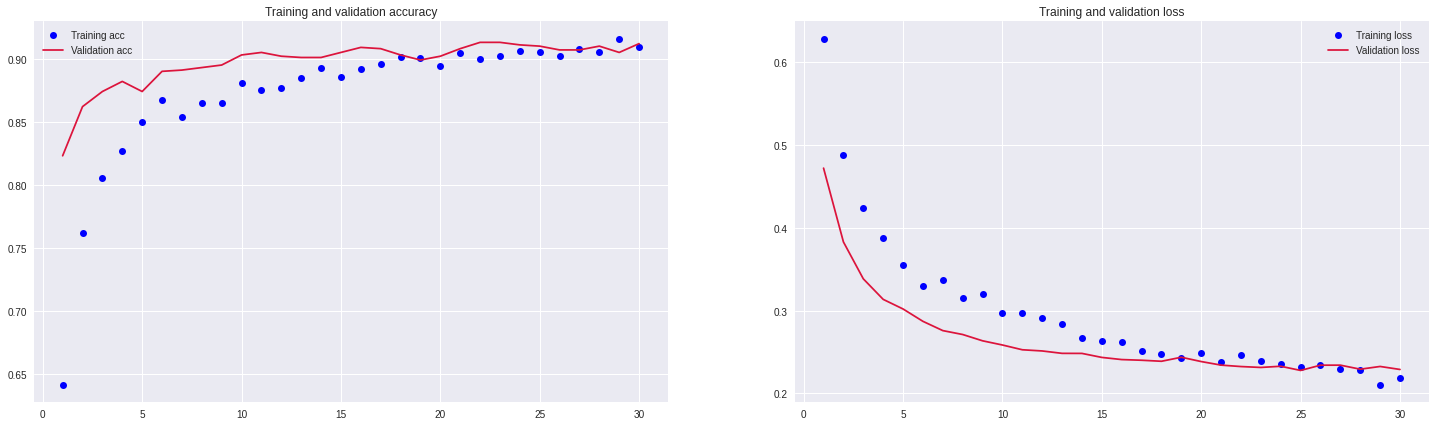

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (25, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, color = 'crimson', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'crimson', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()